<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_1_2_Classificac%CC%A7a%CC%83o_Aprendizagem_bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive", DRIVE_DIRECTORY)

---

In [3]:
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix

# Aprendizagem bayesiana (Naive Bayes)

Comece recuperando os dados preditores, de treino e de teste, a partir do arquivo `cover_type.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem em que salvou.

In [12]:
with open(os.path.join('/content/drive/MyDrive/cursoML/curso_ml', 'cover_type.pkl'), "rb") as f:
    (X_train, y_train, X_test, y_test) = pickle.load(f)

Use o atributo `shape` para verificar quantas instâncias e quantos atributos têm cada uma dessas variáveis.

In [6]:
X_train.shape, y_train.shape

((7500, 53), (7500,))

In [13]:
X_test.shape, y_test.shape

((2500, 53), (2500,))

Agora, seguindo os exemplos apresentandos na aula, implemente uma instância da classe `GaussianNB`, e logo em seguida use os dados de treino para ajustar este classificador.

In [8]:
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)

GaussianNB()

DICA: observe que instanciar o classificador em um Jupyter Notebook exibe um pequeno card com dois botões no topo: (i) que fornece informações sobre o classificador, e (?) que o leva para a documentação.

Use o classificador ajustado para fazer predições com os dados de teste.

In [9]:
y_pred = naive_classifier.predict(X_test)

Exiba esses resultados.

In [10]:
y_pred

array([0, 3, 1, ..., 3, 3, 1])

Utilize a função adequada para determinar a acurácia deste classificador no split de teste.

In [14]:
accuracy_score(y_test, y_pred)

0.142

Exiba a matriz de confusão para o classificador.

0.142

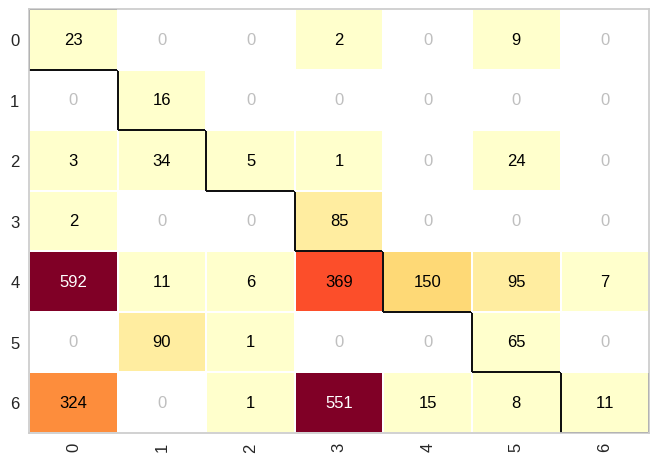

In [15]:
cm = ConfusionMatrix(naive_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Exiba o reporte de classificação no split de teste.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.02      0.68      0.05        34
           1       0.11      1.00      0.19        16
           2       0.38      0.07      0.12        67
           3       0.08      0.98      0.16        87
           4       0.91      0.12      0.22      1230
           5       0.32      0.42      0.36       156
           6       0.61      0.01      0.02       910

    accuracy                           0.14      2500
   macro avg       0.35      0.47      0.16      2500
weighted avg       0.70      0.14      0.15      2500



Estes resultados ficaram bem insatisfatórios. A acurácia não chegou a 15%, mas curiosamente nós observamos no reporte acima que a precisão foi alta para a classe 4, enquanto que o recall foi máximo para a classe 1. Entretanto, o score f1 ficou baixo para todas as classes.

---

**EXTRA**

De acordo com a [documentação da classe GaussianNB](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes):

> "A probabilidade dos atributos é assumida como gaussiana".

Entretanto, nós não temos qualquer razão preliminar para assumir esta premissa. Se ela não for verdadeira, isso pode explicar a baixa acurácia do modelo.

Na mesma página do link, você vai encontrar outros classificadores bayesianos com implementação na biblioteca. Veja que a classe `BernoulliNB` faz uma suposição diferente: ela assume que os atributos seguem uma distribuição de Bernoulli. Tente utilizar esta classe para verificar se obtém resultados melhores.

In [17]:
from sklearn.naive_bayes import BernoulliNB

In [18]:
naive_classifier = BernoulliNB()
naive_classifier = naive_classifier.fit(X_train, y_train)

In [19]:
y_pred = naive_classifier.predict(X_test)

In [20]:
y_pred

array([4, 4, 1, ..., 6, 6, 2])

In [21]:
y_test

array([4, 4, 1, ..., 6, 6, 5])

In [22]:
accuracy_score(y_test, y_pred)

0.642

0.642

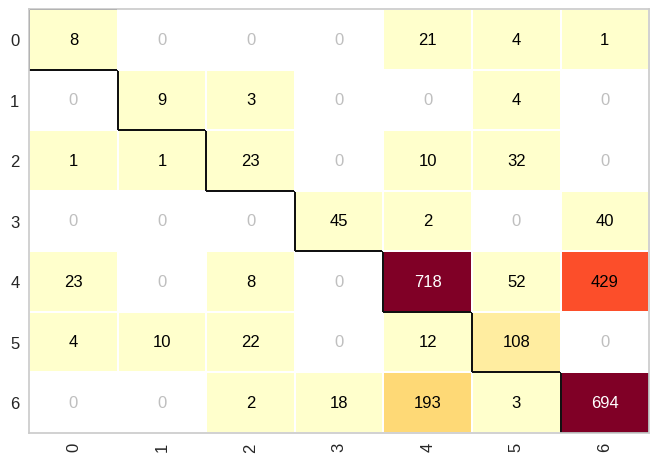

In [23]:
cm = ConfusionMatrix(naive_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.24      0.23        34
           1       0.45      0.56      0.50        16
           2       0.40      0.34      0.37        67
           3       0.71      0.52      0.60        87
           4       0.75      0.58      0.66      1230
           5       0.53      0.69      0.60       156
           6       0.60      0.76      0.67       910

    accuracy                           0.64      2500
   macro avg       0.52      0.53      0.52      2500
weighted avg       0.66      0.64      0.64      2500



De fato os resultados ficaram consideravelmente melhores, o que é um indicativo de que os atributos (pelo menos na forma transformada apresentada ao algoritmo, com escalonamento e *one hot encoding*) seguem uma distribuição mais bernoulliana do que gaussiana.